## 1.IMPORT NECESSARY LIBRARY AND PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


## 2.Reading the csv file

In [3]:
df = pd.read_csv("winequality-red.csv")

## 3.Displaying top 5 records for overview

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 4.Checking missing values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 5.Checking duplicate values

In [7]:
df.duplicated().sum()

240

In [9]:
# shape
df.shape

(1599, 12)

## 6.Drop duplicate values

In [11]:
df.drop_duplicates(inplace=True)

In [13]:
# Now check the shape
df.shape

(1359, 12)

## 7.Obtaining information of the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


## 8.Displaying descriptive statistics for a quick summary of numerical features

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 9.Exploring uniquee values

In [20]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

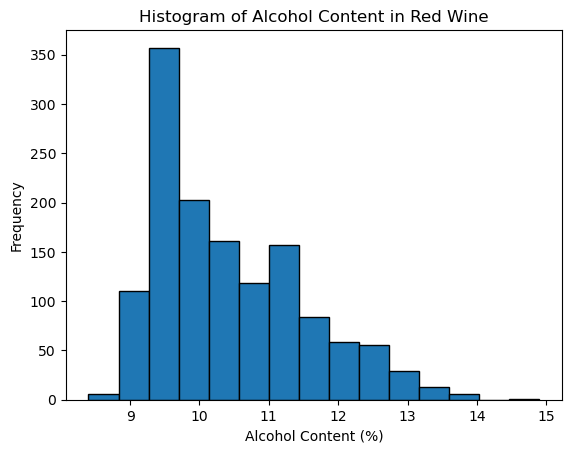

In [21]:
# Histogram for a single numerical variable (e.g., 'alcohol')
plt.hist(df['alcohol'], bins=15, edgecolor='black')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol Content in Red Wine')
plt.show()

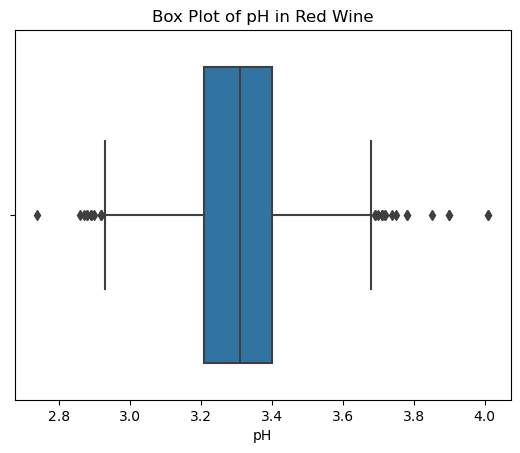

In [22]:
# Box plot
sns.boxplot(x=df['pH'])
plt.xlabel('pH')
plt.title('Box Plot of pH in Red Wine')
plt.show()


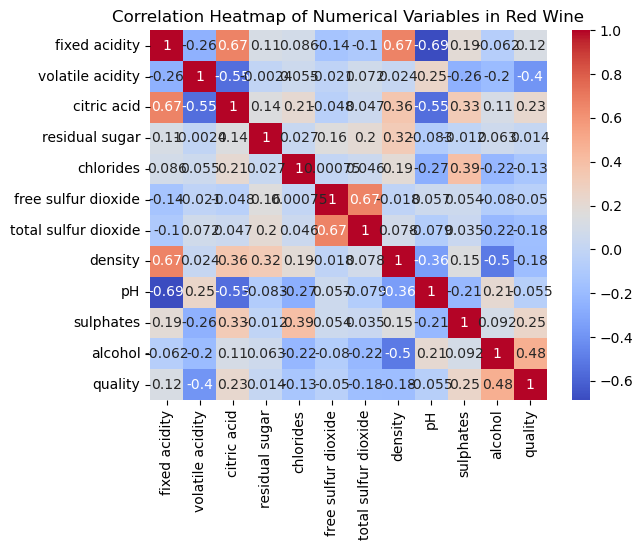

In [23]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables in Red Wine')
plt.show()


In [24]:
## Check for outliers

<Axes: >

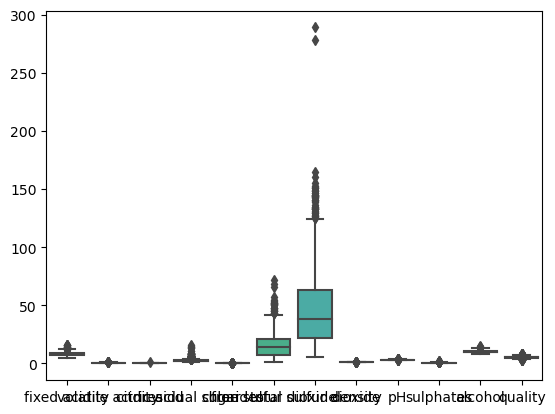

In [25]:
sns.boxplot(data=df)

In [26]:
## remove outliers


<Axes: >

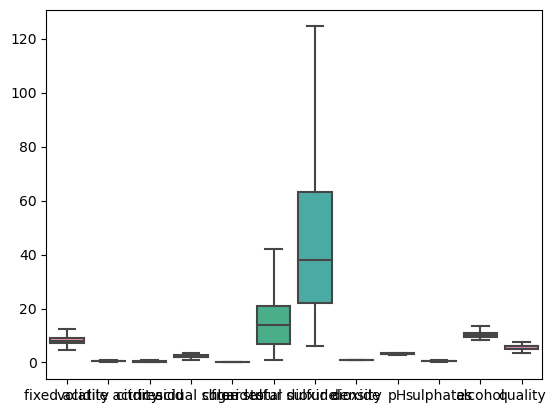

In [27]:
for i in df:
    q1,q3 = df[i].quantile([0.25,0.75])
    iqr= q3-q1
    upper= q3+1.5*iqr
    lower = q1-1.5*iqr
    df[i]=np.where(df[i]> upper , upper , df[i])
    df[i]=np.where(df[i]<lower , lower , df[i])
    
sns.boxplot(df)

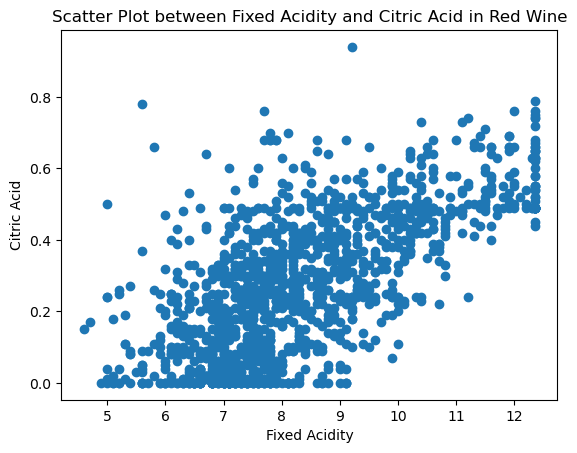

In [28]:
# Scatter plot for two numerical variables (e.g., 'fixed acidity' vs. 'citric acid')
plt.scatter(df['fixed acidity'], df['citric acid'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.title('Scatter Plot between Fixed Acidity and Citric Acid in Red Wine')
plt.show()



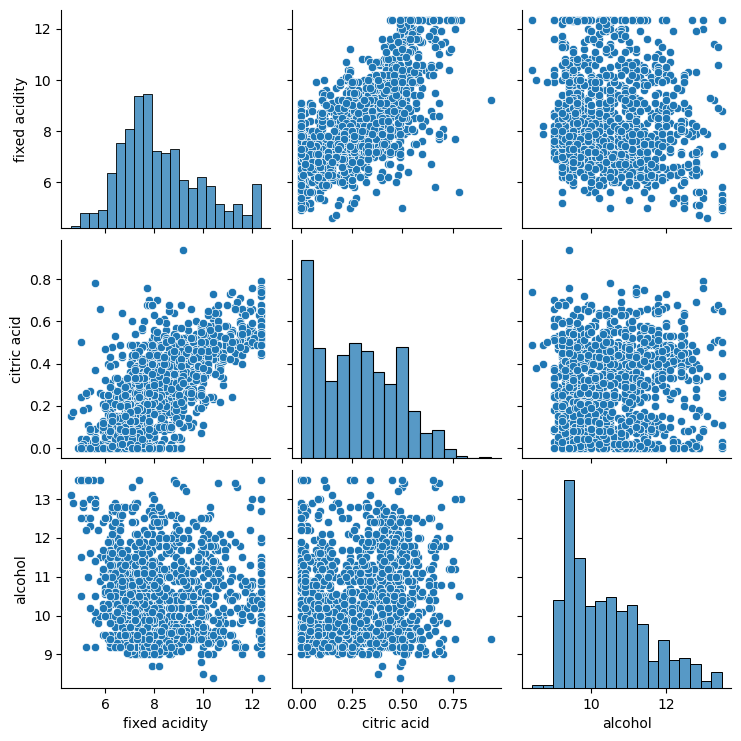

In [29]:
# Pair plot for multiple numerical variables
sns.pairplot(df[['fixed acidity', 'citric acid', 'alcohol']])
plt.show()

In [30]:
## Divide the data into dependent and independent 

In [31]:
X = df.drop('quality',axis=1)
y = df.quality

In [32]:
# Splitting the dataset into training and testing sets

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
X_train.shape


(1019, 11)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
# Creating a linear regression model
model = LinearRegression()

In [41]:
model.fit(X_train,y_train)

LinearRegression()

In [44]:
model.score(X_train,y_train)

0.3597354795603436

In [42]:
# making prediction on testing data
y_pred = model.predict(X_test)

In [43]:
y_pred

array([5.23664444, 5.85802416, 6.4094351 , 5.10398316, 5.19042012,
       6.80632374, 5.63824734, 4.80764051, 5.71496056, 5.6818077 ,
       6.2871372 , 5.94840149, 5.98172051, 5.35122636, 6.39183344,
       5.17788437, 6.027938  , 5.2927968 , 5.2879928 , 5.8423349 ,
       5.24821421, 6.24132415, 5.24657517, 4.68693731, 5.63985214,
       4.84822618, 5.63168228, 5.45232877, 5.23191076, 5.44870875,
       6.07192895, 6.25425954, 5.82692205, 4.77645123, 5.67263425,
       6.26833575, 4.74232491, 5.84513086, 5.3107006 , 6.24139639,
       5.26681662, 5.80445568, 5.94920054, 4.69116099, 5.49752074,
       5.50711091, 5.08840985, 4.69024267, 5.22066358, 5.86869598,
       5.8714958 , 6.13863224, 5.94670863, 5.53077638, 6.3616458 ,
       5.1481421 , 5.342451  , 5.14233628, 4.9914005 , 6.08346519,
       4.8366061 , 6.12852166, 5.20693003, 5.95680347, 5.66697002,
       5.9558419 , 5.02908349, 5.39018144, 6.16114988, 6.14966164,
       5.5052404 , 6.08618301, 5.99271637, 6.04863094, 5.85899

In [55]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, accuracy_score

In [46]:
r2_score(y_test,y_pred)

0.4154408222082716

In [47]:
# r2 score is not close to zero now go for svm

In [52]:
from sklearn.svm import SVR

In [53]:
model2 = SVR()

In [54]:
model2.fit(X_train,y_train)

SVR()

In [58]:
# Making predictions on the testing data
y_pred_svr = model2.predict(X_test)

In [59]:
# Evaluating the SVR model performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [60]:
mse_svr

0.5236387654515352

In [61]:
rmse_svr

0.7236288865513422

In [62]:
r2_svr

0.16785327354000978